In [14]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import sklearn
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# import data
PCCR = pd.read_csv('data/PCCR.csv', sep = ',')

PCCR.head(3)

,Unnamed: 0,NA,3030 Angiocardiography,3040 Audiology,3050 Bacteriology and Microbiology,3070 Birthing Center,3120 Cardiac Catheterization Laboratory,3140 Cardiology,3180 Chemistry,3190 Chemotherapy,...,5500 Med Supplies Charged to Patient,NA.1,5600 Drugs Charged to Patients,5700 Renal Dialysis,5800 ASC,6000 Clinic,6100 Emergency,6201 Observation Beds (Distinct Part),8600 Other Organ Acquisition (Specify),NA.2
0,1,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14654.687778,20905.671111,17865.176667,NaN,NaN,NaN,4661.35375,NaN,NaN,20 Intracranial vascular procedures w PDX hemo...
1,2,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7085.536000,22580.270000,14013.122000,NaN,NaN,NaN,3263.78800,NaN,NaN,21 Intracranial vascular procedures w PDX hemo...
2,3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7261.395000,17200.255000,5793.075000,NaN,NaN,NaN,2984.33000,NaN,NaN,22 Intracranial vascular procedures w PDX hemo...


In [4]:
PCCR.drop('Unnamed: 0', axis=1, inplace=True)
PCCR = PCCR.rename(columns={PCCR.columns[0]: 'DRG'})
PCCR = PCCR.rename(columns={PCCR.columns[56]: 'DRG_DESC'})
PCCR = PCCR.fillna(0) #replace NA with 0

PCCR.head(3)

,DRG,3030 Angiocardiography,3040 Audiology,3050 Bacteriology and Microbiology,3070 Birthing Center,3120 Cardiac Catheterization Laboratory,3140 Cardiology,3180 Chemistry,3190 Chemotherapy,3220 Circumcision,...,5500 Med Supplies Charged to Patient,NA.1,5600 Drugs Charged to Patients,5700 Renal Dialysis,5800 ASC,6000 Clinic,6100 Emergency,6201 Observation Beds (Distinct Part),8600 Other Organ Acquisition (Specify),DRG_DESC
0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14654.687778,20905.671111,17865.176667,0.0,0.0,0.0,4661.35375,0.0,0.0,20 Intracranial vascular procedures w PDX hemo...
1,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7085.536000,22580.270000,14013.122000,0.0,0.0,0.0,3263.78800,0.0,0.0,21 Intracranial vascular procedures w PDX hemo...
2,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7261.395000,17200.255000,5793.075000,0.0,0.0,0.0,2984.33000,0.0,0.0,22 Intracranial vascular procedures w PDX hemo...


In [5]:
PCCR['PCCR_OR_and_Anesth_Costs']=PCCR.apply(lambda row: row['3700 Operating Room'] + row['4000 Anesthesiology'], axis=1)
PCCR = PCCR.loc[~(PCCR['DRG'] == 0),:]

PCCR.head(3)

,DRG,3030 Angiocardiography,3040 Audiology,3050 Bacteriology and Microbiology,3070 Birthing Center,3120 Cardiac Catheterization Laboratory,3140 Cardiology,3180 Chemistry,3190 Chemotherapy,3220 Circumcision,...,NA.1,5600 Drugs Charged to Patients,5700 Renal Dialysis,5800 ASC,6000 Clinic,6100 Emergency,6201 Observation Beds (Distinct Part),8600 Other Organ Acquisition (Specify),DRG_DESC,PCCR_OR_and_Anesth_Costs
0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20905.671111,17865.176667,0.0,0.0,0.0,4661.35375,0.0,0.0,20 Intracranial vascular procedures w PDX hemo...,21805.865556
1,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22580.270000,14013.122000,0.0,0.0,0.0,3263.78800,0.0,0.0,21 Intracranial vascular procedures w PDX hemo...,15172.697333
2,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17200.255000,5793.075000,0.0,0.0,0.0,2984.33000,0.0,0.0,22 Intracranial vascular procedures w PDX hemo...,9857.045000


In [20]:
pccr = PCCR[['DRG','DRG_DESC','PCCR_OR_and_Anesth_Costs']].copy()
kmeans = KMeans(n_clusters=2).fit(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1))
labels = kmeans.labels_
pccr['clusters']=labels
chscore_2 = calinski_harabasz_score(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1),labels)

In [21]:
pccr = PCCR[['DRG','DRG_DESC','PCCR_OR_and_Anesth_Costs']].copy()
kmeans = KMeans(n_clusters=3).fit(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1))
labels = kmeans.labels_
pccr['clusters']=labels
chscore_3 = calinski_harabasz_score(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1),labels)

In [22]:
pccr = PCCR[['DRG','DRG_DESC','PCCR_OR_and_Anesth_Costs']].copy()
kmeans = KMeans(n_clusters=4).fit(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1))
labels = kmeans.labels_
pccr['clusters']=labels
chscore_4 = calinski_harabasz_score(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1),labels)

In [23]:
pccr = PCCR[['DRG','DRG_DESC','PCCR_OR_and_Anesth_Costs']].copy()
kmeans = KMeans(n_clusters=5).fit(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1))
labels = kmeans.labels_
pccr['clusters']=labels
chscore_5 = calinski_harabasz_score(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1),labels)

In [24]:
pccr = PCCR[['DRG','DRG_DESC','PCCR_OR_and_Anesth_Costs']].copy()
kmeans = KMeans(n_clusters=3).fit(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1))
labels = kmeans.labels_
pccr['clusters']=labels
chscore_3 = calinski_harabasz_score(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1),labels)

In [25]:
pccr['clusters'] = pccr['clusters'].astype(str)
pccr.info()
pccr['clusters'] = pccr['clusters'].str.replace('0', 'Low Cost')
pccr['clusters'] = pccr['clusters'].str.replace('1', 'Medium Cost')
pccr['clusters'] = pccr['clusters'].str.replace('2', 'High Cost')
#pccr.to_csv('pccrc.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 701
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DRG                       702 non-null    int64  
 1   DRG_DESC                  702 non-null    object 
 2   PCCR_OR_and_Anesth_Costs  702 non-null    float64
 3   clusters                  702 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 27.4+ KB


([<matplotlib.axis.XTick at 0x7fa196e1cb20>,
 <a list of 10 Text major ticklabel objects>)

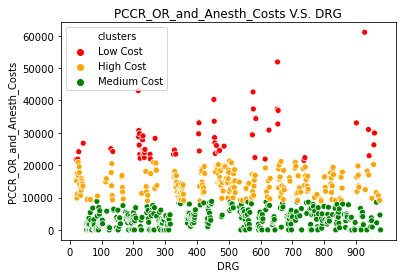

In [28]:
sns.scatterplot(x='DRG', y='PCCR_OR_and_Anesth_Costs',
                hue = 'clusters', palette=['red','orange', 'green'],
                data=pccr)
plt.title('PCCR_OR_and_Anesth_Costs V.S. DRG')
plt.xlabel('DRG')
plt.ylabel('PCCR_OR_and_Anesth_Costs')

my_x_ticks = np.arange(0, 1000, 100)
plt.xticks(my_x_ticks)